In [155]:
import numpy as np
import scipy.io as io
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [156]:
# Load data
data = io.loadmat('../MachineLearning/data/ex3data1.mat')

In [157]:
# Visualizing the data
def displayData(Row):
    return Row.reshape((20, 20), order='F')

In [ ]:
import random

plt.figure(figsize=(15, 15))     # 创建一个名为handwritten的窗口，并设置大小
for i in range(100):
    plt.subplot(10, 10, i+1)
    r = random.randint(0, 4999)
    plt.imshow(displayData(data['X'][r]), cmap='gray')
    plt.title(data['y'][r])
    plt.axis('off')             # 去除子图坐标轴，对上一个画出的子图起作用

plt.show()

In [174]:
# Vectorizing the cost function
def lrCostFunction(theta, lamd, X, y):
    z = X @ theta.reshape(-1, 1)
    h = 1 / (1 + np.exp(-z))
    s = y.T @ np.log(h) + (1 - y).T @ np.log(1 - h) - lamd / 2 * np.sum(np.power(theta[1:], 2))
    return -s / y.shape[0]

In [190]:
# Vectorizing the gradient
def lrGradient(theta, lamd, X, y):
    z = X @ theta.reshape(-1, 1)
    h = 1 / (1 + np.exp(-z))
    tmp = theta[0]
    theta[0] = 0
    p = (X.T @ (h - y)).reshape(1, -1) + lamd * theta
    theta[0] = tmp
    return p / y.shape[0]

In [225]:
# One-va-all Classification
def logicalArrays(y, b):
    ty = y.copy()
    for i in range(len(y)):
        if y[i] != b:
            ty[i] = 0
        else:
            ty[i] = 1
    return ty

def oneVsAll(lamd, X, y):
    mTheta = np.empty(shape=(10, 401))
    for i in range(10):
        ty = logicalArrays(y, i)
        theta = np.zeros(X.shape[1])
        res = opt.fmin_tnc(func=lrCostFunction, x0=theta, fprime=lrGradient, args=(lamd, X, ty), messages=0)
        mTheta[i] = res[0]
    return mTheta

In [226]:
X1 = data['X']
y1 = data['y']

for i in range(y1.shape[0]):
    if y1[i] == 10:
        y1[i] = 0
X1 = np.c_[np.ones(X1.shape[0]), X1]
mTheta = oneVsAll(1, X1, y1)
print(mTheta.shape)

(10, 401)


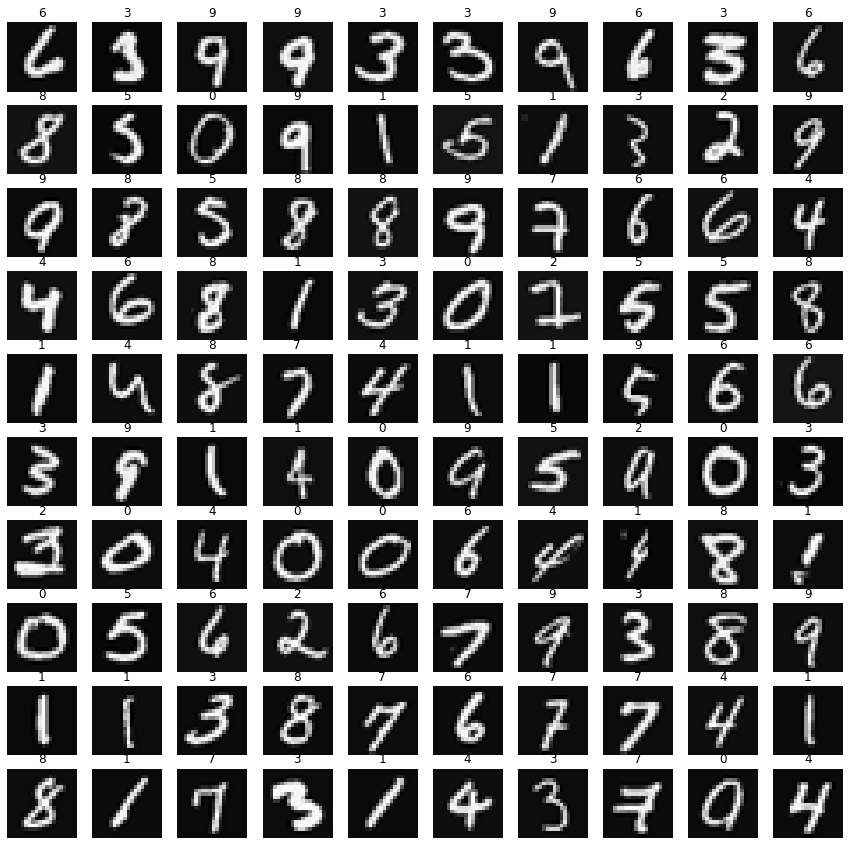

In [249]:
def predicion(x):
    p = mTheta @ x.T
    return np.argmax(p)

plt.figure(figsize=(15,15))
for i in range(100):
    r = random.randint(0, 4999)
    plt.subplot(10, 10, i+1)
    img = displayData(data['X'][r])
    plt.title(predicion(X1[r]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [234]:
# One-vs-all prediction
def predictOneVsAll():
    correct = 0
    for i in range(X1.shape[0]):
        if predicion(X1[i]) == y1[i]:
            correct += 1
    return correct / X1.shape[0]

In [235]:
print("5000 samples, accuracy is about ", predictOneVsAll())

5000 samples, accuracy is about  0.9446


In [244]:
dataWeight = io.loadmat('../MachineLearning/data/ex3weights.mat')
dataWeight.keys()
Theta1 = dataWeight['Theta1']
Theta2 = dataWeight['Theta2']
print(Theta1.shape, Theta2.shape)

(25, 401) (10, 26)


In [267]:
def sigmoid(theta, x):
    z = theta @ x.T
    return 1 / (1 + np.exp(-z))

def neuralPredict(x):
    a2 = sigmoid(Theta1, x)
    a2 = np.insert(a2, 0, 1)
    h = sigmoid(Theta2, a2)
    index = np.argmax(h)
    if index == 9:
        return 0
    else:
        return index + 1

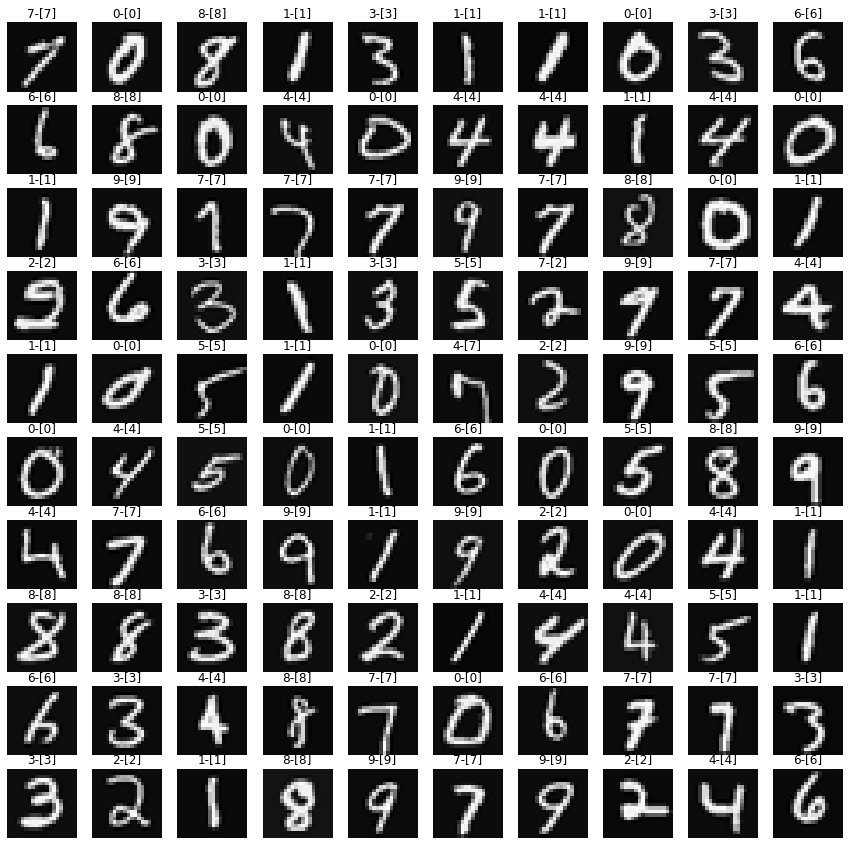

In [268]:
plt.figure(figsize=(15,15))
for i in range(100):
    r = random.randint(0, 4999)
    plt.subplot(10, 10, i+1)
    img = displayData(data['X'][r])
    plt.title(f"{neuralPredict(X1[r])}-{data['y'][r]}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [272]:
correct = 0
for i in range(5000):
    if data['y'][i] == neuralPredict(X1[i]):
        correct += 1
print("5000 samples, accuracy is about ", correct / X1.shape[0])

5000 samples, accuracy is about  0.9752
